In [1]:
#==========================讀取網頁資料==========================
import requests
from bs4 import BeautifulSoup

url = 'http://www.cwb.gov.tw/V7/forecast/town368/3Hr/6300100.htm'  #松山區天氣預報
print(url)
res = requests.get(url)
res.encoding = 'utf-8'
soup = BeautifulSoup(res.text, 'html.parser')
trs = soup.find_all('tr')  #取得所有「tr」標籤


http://www.cwb.gov.tw/V7/forecast/town368/3Hr/6300100.htm


In [2]:
import pandas as pd
import datetime
import re

columns = ['date_time','week','status','status_image']  #欄位名稱
df = pd.DataFrame(columns=columns)                      #建立DataFrame
print(df)
years = []                                              #form date_time column 
years.append("%d" % datetime.datetime.now().year)
years.append("%d" % (datetime.datetime.now() + datetime.timedelta(days=1)).year) #第二天年份
years.append("%d" % (datetime.datetime.now() + datetime.timedelta(days=2)).year) #第三天年份
print(years)

days = []  #存星期幾
dates = []
colspans = []

#處理第一層
tdall = trs[0].findAll('td')
k=0
for i in range(len(tdall)): 
    td = tdall[i]
    if i > 0:  #從第二個td開始處理
        if td.has_attr('colspan'):  #如果有colspan標籤
            colspans.append(td.attrs['colspan'])  #取得colspan屬性值
        else:
            colspans.append("1")
        monthdate = re.findall('\d+', td.text)  #取得月日,如05/02
        dates.append(years[k] + '-' + monthdate[0] + '-' + monthdate[1])
        days.append(re.findall('[一|二|三|四|五|六|日]', td.text)[0]) #取得星期"幾"
        k+=1
#處理第二層
ts = []  #存日期及時間
weekdays = []  #存星期幾
hours = trs[1].findAll('span')
k=0
for i in range(0, len(colspans)):  
    for j in range(0, int(colspans[i])):  #複複取值
        ts.append(dates[i] + ' ' + hours[k].text)  #日期+時間
        k+=1
        weekdays.append('' + days[i])
df['date_time'] = ts
df['week'] = weekdays
    
#處理第三層
wxs = []  #存天氣狀況
wxs.append([])
wxs.append([])
for img in trs[2].findAll('img'):
    wxs[0].append(img.attrs['alt'])  #文字資料位於alt屬性
    wxs[1].append(img.attrs['src'])  #文字資料位於alt屬性
df['status'] = wxs[0]
df['status_image'] = wxs[1]
print(df)

Empty DataFrame
Columns: [date_time, week, status, status_image]
Index: []
['2019', '2019', '2019']
           date_time week   status                         status_image
0   2019-04-17 18:00    三       多雲  /V7/symbol/weather/gif/night/02.gif
1   2019-04-17 21:00    三       多雲  /V7/symbol/weather/gif/night/02.gif
2   2019-04-18 00:00    四        晴  /V7/symbol/weather/gif/night/01.gif
3   2019-04-18 03:00    四        晴  /V7/symbol/weather/gif/night/01.gif
4   2019-04-18 06:00    四       多雲    /V7/symbol/weather/gif/day/02.gif
5   2019-04-18 09:00    四       多雲    /V7/symbol/weather/gif/day/02.gif
6   2019-04-18 12:00    四       多雲    /V7/symbol/weather/gif/day/02.gif
7   2019-04-18 15:00    四       多雲    /V7/symbol/weather/gif/day/02.gif
8   2019-04-18 18:00    四       多雲  /V7/symbol/weather/gif/night/02.gif
9   2019-04-18 21:00    四        陰  /V7/symbol/weather/gif/night/03.gif
10  2019-04-19 00:00    五        陰  /V7/symbol/weather/gif/night/03.gif
11  2019-04-19 03:00    五  短暫陣雨或雷雨  

In [3]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
#image URL to image array
def img2arr_fromURLs(url_list, resize = False):
    img_list=[]
    for url in url_list:
        response = requests.get(url)
        try:
            img=Image.open(BytesIO(response.content))
        except :
            pass
        else:
            img_list.append(img)
    return img_list

1


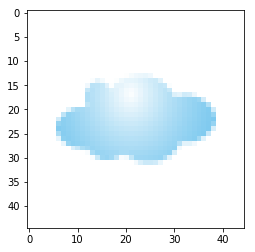

1


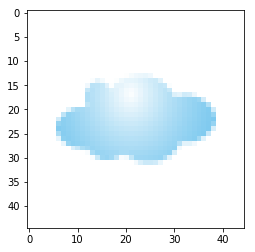

1


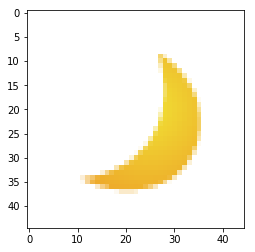

1


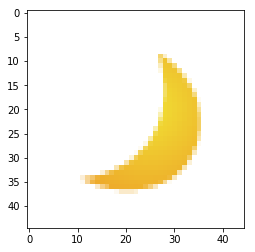

1


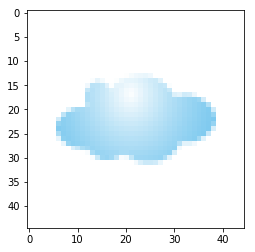

1


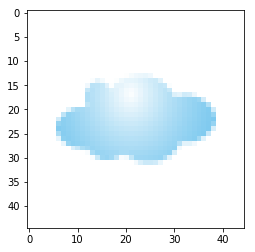

1


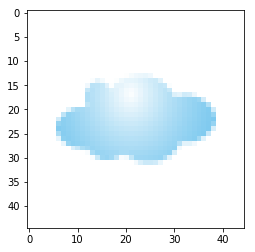

1


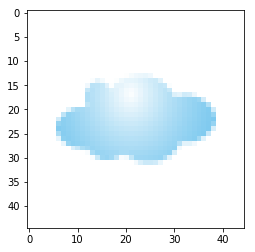

1


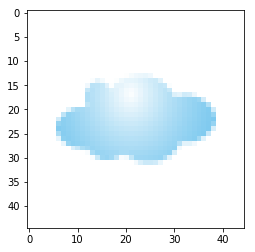

1


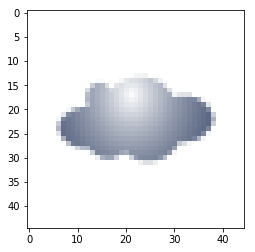

1


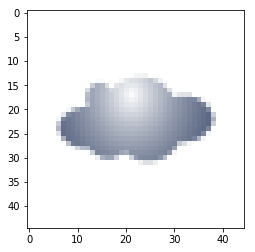

1


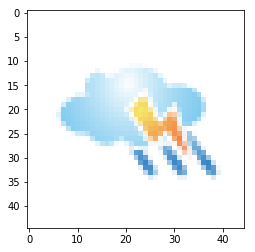

1


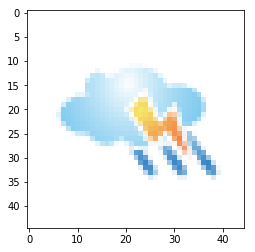

1


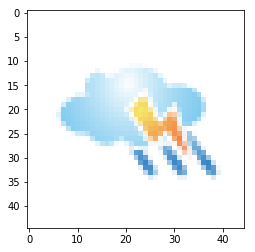

1


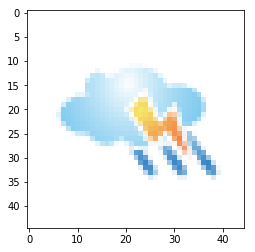

1


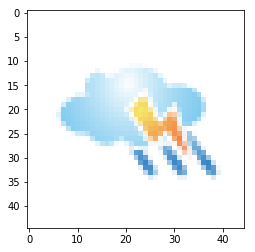

1


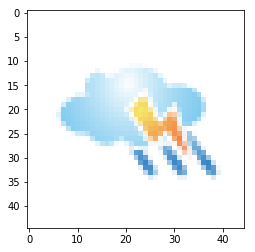

In [4]:
result = img2arr_fromURLs('http://www.cwb.gov.tw'+df['status_image'])
for im_get in result:
    print('1')
    plt.imshow(im_get)
    plt.show()